In [1]:
import pandas as pd
import json
import urllib.request
import matplotlib.pyplot as plt

In [2]:
player_name_id_map = pd.read_csv('./data/player_name_id_map.csv')

masters_champ = pd.read_csv('./data/masters_champ.csv')
us_open_champ = pd.read_csv('./data/us_open_champ.csv')
british_open_champ = pd.read_csv('./data/british_open_champ.csv')
uspga_champ = pd.read_csv('./data/uspga_champ.csv')

hist_acc = []
cache = {}

def fetch_player_ranking_data(player_id):
    owgr_url = 'http://www.owgr.com/layouts/OWGR/PlayerRankingsForGraph.aspx?playerID={}'.format(player_id)

    with urllib.request.urlopen(owgr_url) as response:
        res = response.read()
        return json.loads(json.loads(res))

In [3]:
combined_df =  masters_champ.append(us_open_champ).append(british_open_champ).append(uspga_champ)
combined_df

,year,player,week_start,week_end
0,2019,Tiger Woods,2019-04-07,2019-04-14
1,2018,Patrick Reed,2018-04-01,2018-04-08
2,2017,Sergio Garcia,2017-04-02,2017-04-09
3,2016,Danny Willett,2016-04-03,2016-04-10
4,2015,Jordan Spieth,2015-04-05,2015-04-12
...,...,...,...,...
30,1990,Wayne Grady,1990-08-05,1990-08-12
31,1989,Payne Stewart,1989-08-06,1989-08-13
32,1988,Jeff Sluman,1988-08-07,1988-08-14
33,1987,Larry Nelson,1987-08-02,1987-08-09


In [15]:
for idx, row in combined_df.iterrows():
    
    player_name = row['player']
    player_row = player_name_id_map.loc[player_name_id_map['name'] == player_name]
    player_id = player_row['player_id'].values[0]
    week_start = row['week_start']
    
    if player_name not in cache:
        player_stats = fetch_player_ranking_data(player_id)
        cache[player_name] = player_stats
    else:
        player_stats = cache[player_name]
        
    for entry in player_stats["player"]:
        if 'week' in entry:
            if entry['week'] == week_start:
                rank = entry['rank']
                hist_acc.append(rank)

No handles with labels found to put in legend.


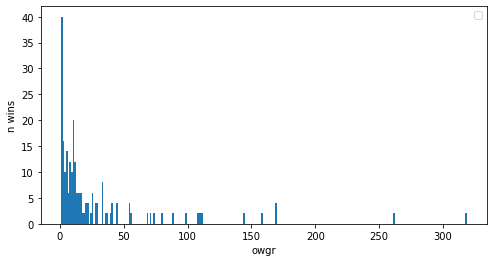

In [33]:
hist_acc_int = [int(i) for i in hist_acc]
fig, axs = plt.subplots(1, 1, figsize=(8,4))
(bins, edges, p) = axs.hist(hist_acc_int, bins=252)

axs.set_ylabel('n wins')
axs.set_xlabel('owgr')
axs.legend(loc=1)


In [35]:
print(sum(bins[0:10])/len(bins))
print(sum(bins[0:15])/len(bins))
print(sum(bins[0:25])/len(bins))
print(sum(bins[0:50])/len(bins))

0.5793650793650794
0.6666666666666666
0.7619047619047619
0.873015873015873


In [37]:
# with open('cache.json', 'w') as outfile:
#     json.dump(cache, outfile)